In [2]:
## comment
## observations

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"E:/ineuron datasets/StudentsPerformance.csv")

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.shape

(1000, 8)

In [7]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data["gender"].dtypes

dtype('O')

In [10]:
data['gender'].dtypes == 'O'

True

In [11]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
cat_cols = [feature for feature in data.columns if data[feature].dtype == 'O']
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
num_cols = [feature for feature in data.columns if data[feature].dtype != 'O']
num_cols

['math score', 'reading score', 'writing score']

In [14]:
data[num_cols]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [15]:
## to check memory usage of columns
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## missing values 

In [16]:
## checking missing values 
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
data.isnull().sum().sum()

0

## checking duplicate values

In [18]:
data.duplicated().sum()

0

## checking unique values

In [19]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [20]:
data.nunique().sum()

247

In [21]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [22]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## checking correlation

In [23]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## observations :-
1. if we are a good reader ,then we are a good writer

## checking covariance

In [24]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


## checking skewness

In [25]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

## observations :- 
1. all variables are left skewed

<Axes: xlabel='math score', ylabel='Density'>

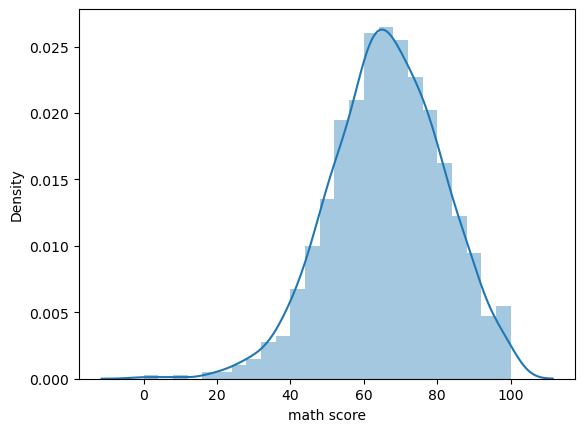

In [26]:
sns.distplot(data['math score'])

## adding average column inside dataset

In [27]:
data['avg score'] = (data['math score']+data['reading score']+data['writing score'])/3

In [28]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## groupby

In [29]:
data.groupby('gender').mean()

,math score,reading score,writing score,avg score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [30]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [31]:
data[data['math score']<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
avg score                      14
dtype: int64

## checking normality

In [32]:
data_num = data[num_cols]

In [33]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [34]:
from scipy.stats import normaltest

In [35]:
normaltest(data_num["math score"])[1] * 100

0.04508029386993784

In [36]:
normaltest(data_num["math score"])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

## if p > 0.05 then my data will be normally distributed

<Axes: xlabel='math score', ylabel='Density'>

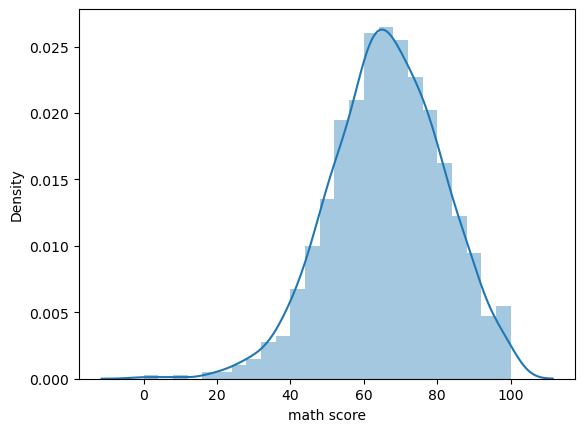

In [37]:
sns.distplot(data_num["math score"])

## Checking outliers 

<Axes: >

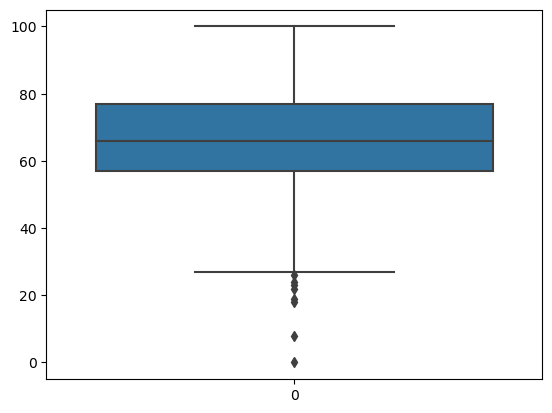

In [38]:
sns.boxplot(data['math score'])

<Axes: >

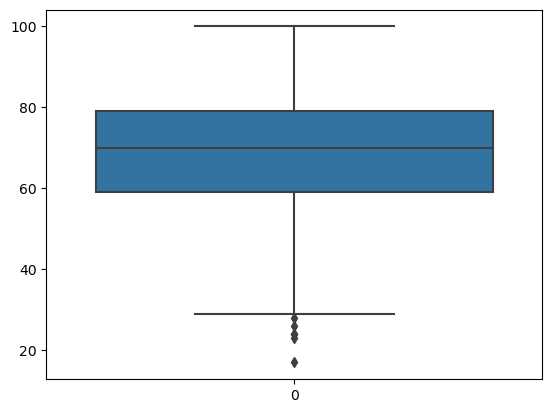

In [39]:
sns.boxplot(data['reading score'])

<Axes: >

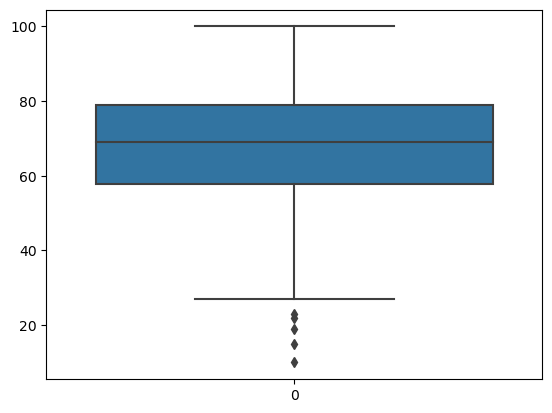

In [40]:
sns.boxplot(data['writing score'])

## finding quantiles

In [52]:
q1 = data['math score'].quantile(0.25)

In [53]:
q3 = data['math score'].quantile(0.75)

In [54]:
q1,q3

(57.0, 77.0)

In [55]:
IQR = q3 - q1

In [56]:
IQR

20.0

In [57]:
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [58]:
upper_limit,lower_limit

(107.0, 27.0)

In [59]:
data[data["math score"] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [60]:
data[data["math score"] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score


In [69]:
def outlier_threshold(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    return upper_limit,lower_limit


In [70]:
upper_limit,lower_limit = outlier_threshold(data,'math score')

In [71]:
upper_limit,lower_limit

(107.0, 27.0)

In [72]:
for variable in data_num.columns:
    up_limit,lower_limit = outlier_threshold(data,variable)
    print(up_limit,lower_limit)

107.0 27.0
109.0 29.0
110.875 25.875


In [73]:
def replace_with_threshold(data,columns):
    for variable in columns:
        up_limit,lower_limit = outlier_threshold(data,variable)
        

In [ ]:
replace_with_threshold(data,num_cols)

In [86]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## Graph Analysis

In [88]:
sns.countplot(data["race/ethnicity"])
# data['gender'].unique()

ValueError: could not convert string to float: 'group B'